<a href="https://colab.research.google.com/github/otaviodefilpo/credit-card-fraud-prediction/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito_Ot%C3%A1vio_de_Filpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Projeto do Módulo 4 - Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>


Primeiro importaremos os pacotes relacionados à análise exploratória de dados

In [ ]:
# importar os pacotes necessários
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# Criando um backup do Dataframe
cards = df.copy()

#Tamanho do Dataset
print('Nosso Dataset possui {} entradas e {} variáveis'.format(cards.shape[0],cards.shape[1]))

# **Análise Exploratória**

Para chegarmos à uma predição com scores mais altos, a etapa inicial, de exploração dos dados é fundamental. Detalhes importante que precisamos observar neste momento:

* Quais variáveis são importantes para eu entender melhor a exploração do Dataset?
* Precisamos limpar quanto o Dataset? Quantos valores ausentes ele possui?
* O Dataset está desbalanceado? Se sim, como está disposto esse desbalanceamento?
* Quais variáveis do Dataset precisam ser mantidas ou removidas? Estas variáveis já estão balanceadas?

Vamos observar primeiramente as 5 primeiras entradas do Dataset

In [ ]:
# Observando os 5 primeiros valores do Dataset
cards.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Aqui percebemos que as variáveis `Time`, que mostra o tempo em segundos da transação, `Amount`, que mostra o montante da transação e `Class`, que mostra se foi fraude ou não, serão fundamentais para entendermos melhor cada variável disponível.

Agora observaremos a porcentagem de valores ausentes no Dataset

In [ ]:
# Observando a porcentagem de valores ausentes para cada variável
round((cards.isnull().sum()  / cards.shape[0]).sort_values(ascending = False),2)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Nosso Dataset está sem valores ausentes, o que é uma ótima notícia.

Vamos visualizar algumas informações estatísticas dos nossos dados com a função `describe()`

In [ ]:
# Usando o método describe()
cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Como não conhecemos melhor a maioria das nossas variáveis, nossa análise fica prejudicada por não termos parâmetros externos para nos basearmos. Observando as variáveis `Time`, `Amount` e `Class` não há nenhum valor discrepante aparente, estatisticamente as outras variáveis que não conhecemos mais a fundo também não possuem mais valores discrepantes. 

Um passo importante é observar se o Dataset está desbalanceado e como esse desbalanceamento está

0    284315
1       492
Name: Class, dtype: int64

Os valores de classe 1 representam 0.1727% do dataset



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


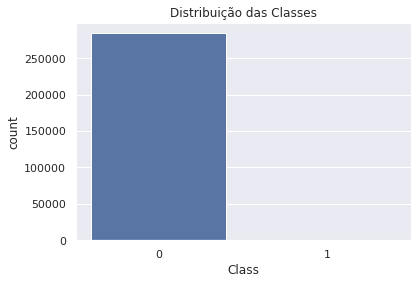

In [ ]:
#Observando o balanceamento
print(cards.Class.value_counts())
print("\nOs valores de classe 1 representam {:.4f}% do dataset\n".format(((cards[cards['Class'] == 1].shape[0]) / cards.shape[0])*100))

#Plotando o gráfico do balanceamento
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot('Class', data=cards, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot();

Percebemos acima que temos um Dataset bastante desbalanceado, com cerca de apenas 17% de Classe 1, ou seja, valores positivos para fraude.

Para continuar, vamos entender como estão as distribuições das nossas outras colunas conhecidas, `Time` e `Amount`

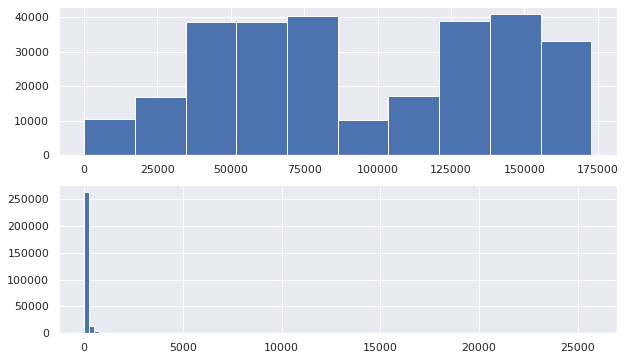

In [ ]:
# Histograma Time e Amount
fig, ax = plt.subplots(nrows = 2, ncols=1,figsize=(10,6))
cards.Time.hist(ax=ax[0])
cards.Amount.hist(ax=ax[1],bins=100)

Ainda explorando as variáveis `Time` e `Amount` vamos observar os histogramas da variável `Time` para valores 0 e 1, repetindo o mesmo processo para a variável `Amount`.

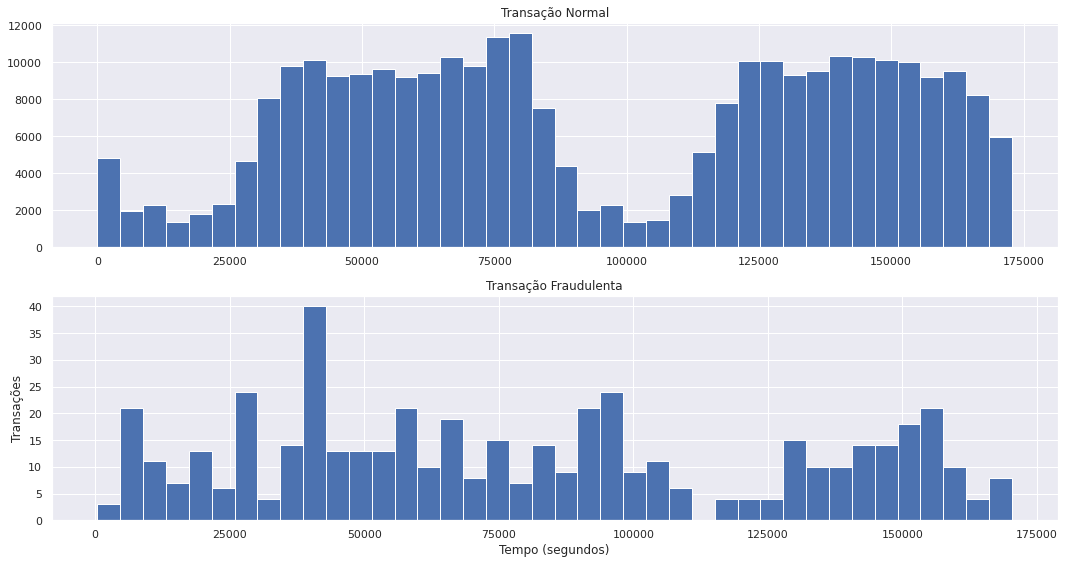

In [ ]:
# Plotando histograma de Time (tempo em segundos) das classes
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15,8))
ax[0].hist(cards.Time[cards.Class == 0], bins=40)
ax[0].set_title('Transação Normal')

ax[1].hist(cards.Time[cards.Class == 1], bins=40)
ax[1].set_title("Transação Fraudulenta")

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

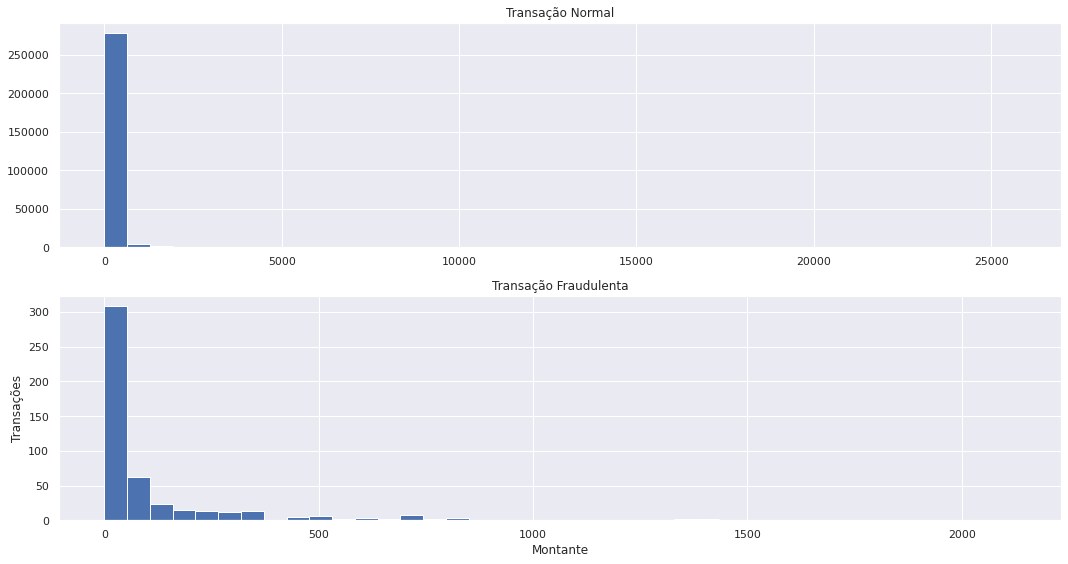

In [ ]:
# Plotando histograma de Amount (montante da transção) das classes
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15,8))
ax[0].hist(cards.Amount[cards.Class == 0], bins=40)
ax[0].set_title('Transação Normal')

ax[1].hist(cards.Amount[cards.Class == 1], bins=40)
ax[1].set_title("Transação Fraudulenta")

plt.xlabel('Montante')
plt.ylabel('Transações')
plt.tight_layout()

Percebemos que há diferenças, mesmo que não tão discrepantas, entre as distribuições para transações normais e transações fraudulentas, o que provavelmente irá nos ajudar nas predições do modelo.

Uma diferença de destaque foi a da distribuição de Amount para transações fraudulentas, vamos observá-la melhor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


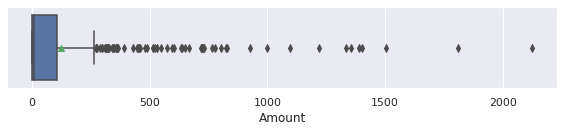

In [ ]:
# Definindo variável auxiliar
auxcard = cards[(cards.Class == 1)]

# Plotando um boxplot para Amount de transações fraudulentas
fig, ax = plt.subplots(figsize=(8,2))
sns.boxplot(auxcard.Amount, showmeans=True, ax=ax)

plt.tight_layout()

Percebemos que a transação fraudulenta tem valores de montantes bem menores que as normais, isso pode nos ajudar no modelo.

Ao fim da nossa exploração descobrimos sobre o Dataset:
* Não possui valores ausentes.
* O Dataset está bastante desbalanceado, precisaremos resolver isso logo mais.
* As variáveis `Time` e `Amount` estão numa escala bem diferente das demais variáveis, que vamos assumir terem sido padronizadas previamente, então faremos o mesmo com as restantes.

Vamos ao próximo passo!

# **Preparação dos Dados**

Vamos padronizar os dados necessários, dividí-los entre treino e teste, e balanceá-los, mas antes de tudo vamos importar as bibliotecas necessárias para o prosseguimento do projeto de Machine Learning.

In [ ]:
# Importando Bibliotecas necessárias
!pip install scikit-plot -q
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

Agora sim vamos começar com as atividades necessárias, primeiramente padronizando as variáveis `Time` e `Amount`

In [ ]:
# Criando um backup do Dataset
cards_clean = df.copy()

In [ ]:
# Padronizando os dados
std_scaler = StandardScaler()

cards_clean['std_amount'] = std_scaler.fit_transform(cards_clean['Amount'].values.reshape(-1, 1))
cards_clean['std_time'] = std_scaler.fit_transform(cards_clean['Time'].values.reshape(-1, 1))

# Removendo as variáveis que não usaremos
cards_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
cards_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Acima está o nosso novo Dataset, já com os dados de `Time` e `Amount` padronizados

Agora vamos dividir entre conjunto de treino e de teste.

In [ ]:
# Separar as variáveis para X e y
X = cards_clean.drop('Class', axis = 1)
y = cards['Class']

# Dividindo entre Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, shuffle=True)

Agora para o passo de balanceamento de dados, utilizando a biblioteca `imblearn` conseguimos facilmente chegar ao resultado desejado. O método de balanceamento escolhido foi o `RandomUnderSampler`, que balanceia os dados a partir da classe minoritária.

1    369
0    369
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


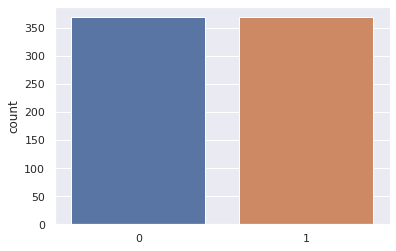

In [ ]:
# Balanceando os dados
rus = RandomUnderSampler()
X_rus,y_rus = rus.fit_sample(X_train, y_train)

# Ver o resultado do balanceamento
print(pd.Series(y_rus).value_counts())

# Visualizando o balanceamento por gráfico de barra
sns.countplot(y_rus)

Acima podemos ver que os dados de classe estão balanceados.

# **Modelo de Machine Learning**

Chegando ao momento de criação do modelo, nós utilizaremos o método de Regressão Logística, que apesar do nome, é um método preditivo de classificação para valores de 0 ou 1, que é o ideal para nosso caso.

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
lreg = LogisticRegression()
lreg.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = lreg.predict(X_test)
y_proba = lreg.predict_proba(X_test)

Antes de analisar o desempenho deste primeiro modelo criado, vamos instanciar um segundo modelo com o número de variáveis reduzido pela metade, utilizando `PCA` que significa 'Principal Component Analysis', ou Análise de componentes principais, que é um método de reduzir o número de variáveis de um banco de dados, escolhendo apenas as que mais influenciam pro resultado final do modelo.

Após os 2 modelos serem gerados, vamos analisar e comparar os seus desempenhos

Antes de tudo vamos importar o PCA e já aplicar no nosso X.

In [ ]:
# Importando PCA
from sklearn.decomposition import PCA

In [ ]:
# Diminuindo o número de componentes
pca = PCA(n_components=15)
pca.fit(X)
X2 = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X2.shape)

original shape:    (284807, 30)
transformed shape: (284807, 15)


Observem que o recém criado X2 agora possui apenas 15 variáveis.

A partir daqui, vamos repetir os passos para o modelo 2 que já fizemos no modelo 1.

In [ ]:
# Dividindo em Treino e Teste novamente
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y, stratify=y, shuffle=True)

In [ ]:
# Balanceando novamente
X2_rus,y2_rus = rus.fit_sample(X2_train, y2_train)

# Ver o resultado do balanceamento
print(pd.Series(y2_rus).value_counts())

1    369
0    369
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Rodando o novo modelo
np.random.seed(2)
lreg.fit(X2_rus, y2_rus)

# fazer as previsões em cima dos dados de teste
y2_pred = lreg.predict(X2_test)
y2_proba = lreg.predict_proba(X2_test)

# **Avaliar o desempenho dos modelos**

Vamos dar output nos scores que avaliarão o desempenho dos nossos modelos

In [ ]:
# imprimir relatório de classificação Modelo 1
print("Relatório de Classificação do Modelo 1:\n", classification_report(y_test, y_pred, digits=4))
# imprimir a acurácia do modelo
print("Acurácia Modelo 1: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
# imprimir a área sob da curva
print("AUC Modelo 1: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

######################################################################

# imprimir relatório de classificação
print("Relatório de Classificação do Modelo 2:\n", classification_report(y2_test, y2_pred, digits=4))
# imprimir a acurácia do modelo
print("Acurácia Modelo 2: {:.4f}\n".format(accuracy_score(y2_test, y2_pred)))
# imprimir a área sob da curva
print("AUC Modelo 2: {:.4f}\n".format(roc_auc_score(y2_test, y2_pred)))

Relatório de Classificação do Modelo 1:
               precision    recall  f1-score   support

           0     0.9999    0.9684    0.9839     71079
           1     0.0486    0.9350    0.0925       123

    accuracy                         0.9683     71202
   macro avg     0.5243    0.9517    0.5382     71202
weighted avg     0.9982    0.9683    0.9823     71202

Acurácia Modelo 1: 0.9683

AUC Modelo 1: 0.9517

Relatório de Classificação do Modelo 2:
               precision    recall  f1-score   support

           0     0.9999    0.9669    0.9831     71079
           1     0.0462    0.9268    0.0880       123

    accuracy                         0.9668     71202
   macro avg     0.5230    0.9469    0.5355     71202
weighted avg     0.9982    0.9668    0.9816     71202

Acurácia Modelo 2: 0.9668

AUC Modelo 2: 0.9469



Agora vamos plotar a Matriz de confusão para os 2 modelos e comparar seus desempenhos.

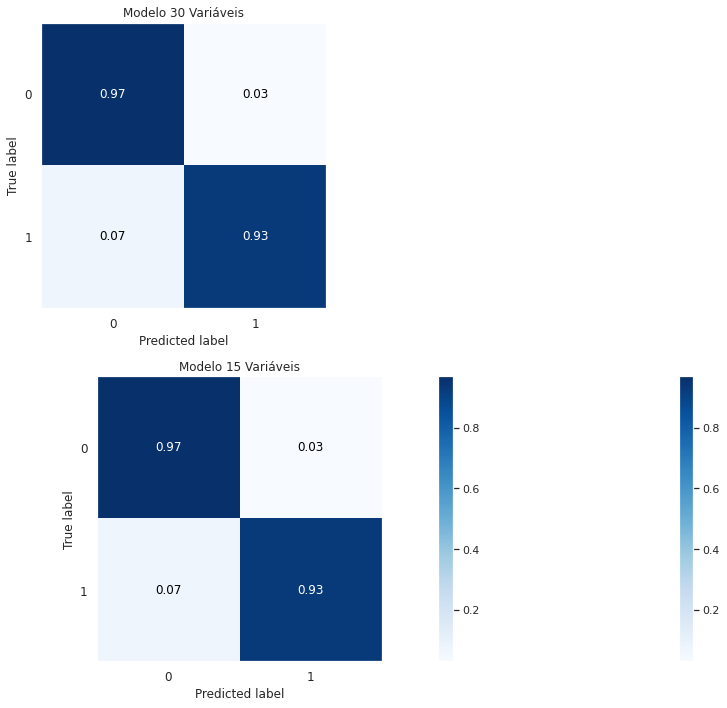

In [ ]:
# Plotando a matriz de confusão dos dois modelos
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10))

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, ax=ax[0])
ax[0].set_title('Modelo 30 Variáveis')

skplt.metrics.plot_confusion_matrix(y2_test, y2_pred, normalize=True, ax=ax[1])
ax[1].set_title('Modelo 15 Variáveis')

plt.tight_layout()

Após avaliar o desempenho dos dois modelos, podemos observar que estes tiverem desempenho parecido nos scores de precision, recall e f1-score, com valores próximos à 0.95, logo foi um desempenho bastante satisfatório. Mas o detalhe a se ressaltar é que o modelo 2 foi construído com metade do número de variáveis do modelo 1, escolhidas pelo uso da PCA, mostrando a importância da utilização dessa análise na construção de um modelo de Machine Learning. 

Antes de finalizarmos o projeto, vamos comparar com alguns gráficos as diferenças entre os datasets dos nossos modelos, para que fiz mais fácil de visualizar a importância dos tratamentos que fizemos

Primeiramente um distplot, que nos mostra a distribuição das nossas variáveis usadas nos modelos.

In [ ]:
# Primeiramente criando Datasets de auxílio
m1_mgd = X_test.copy()
m1_mgd['pred'] = y_test

m2_mgd = pd.DataFrame(data=X2_test)
m2_mgd['pred'] = y2_test

print("O dataset final do modelo 1 possui {} linhas e {} colunas".format(m1_mgd.shape[0],m1_mgd.shape[1]))
print("O dataset final do modelo 2 possui {} linhas e {} colunas".format(m2_mgd.shape[0],m2_mgd.shape[1]))

O dataset final do modelo 1 possui 71202 entradas e 31 variáveis
O dataset final do modelo 2 possui 71202 entradas e 16 variáveis


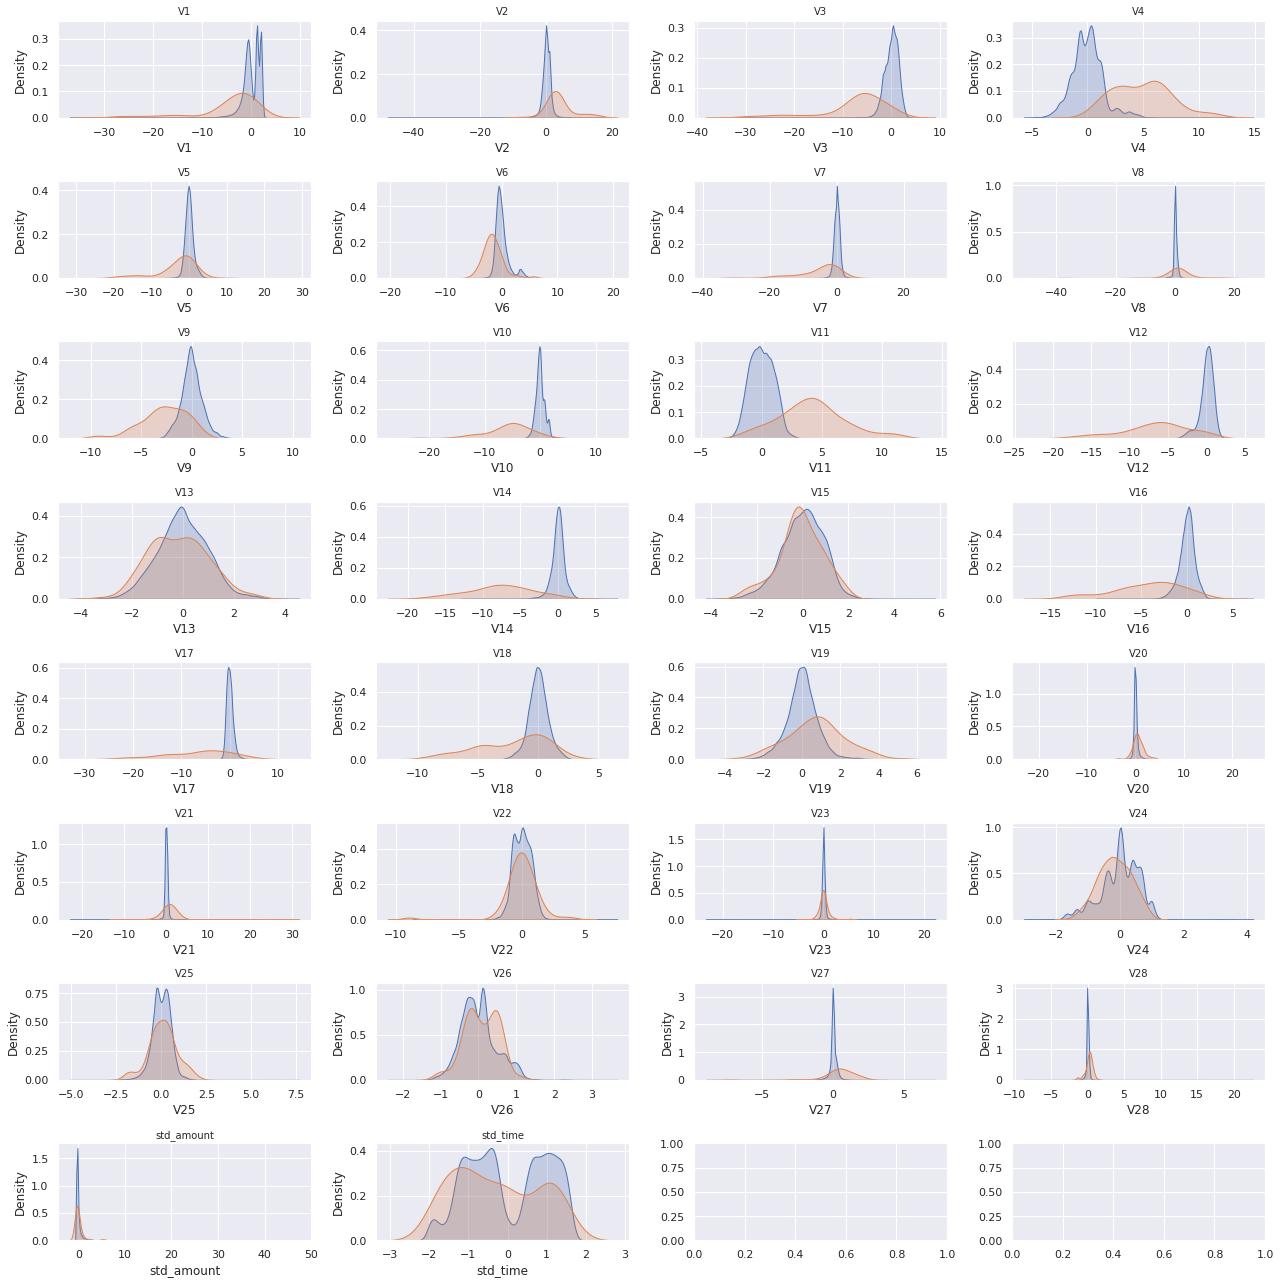

In [ ]:
# Fazendo o Distplot das variáveis do modelo 1
column_names = m1_mgd.drop(['pred'], axis=1).columns
num_plots = len(column_names)
m1_class_0 = m1_mgd[m1_mgd.pred == 0]
m1_class_1 = m1_mgd[m1_mgd.pred == 1]

fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(8, 4, idx)
    sns.kdeplot(m1_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(m1_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

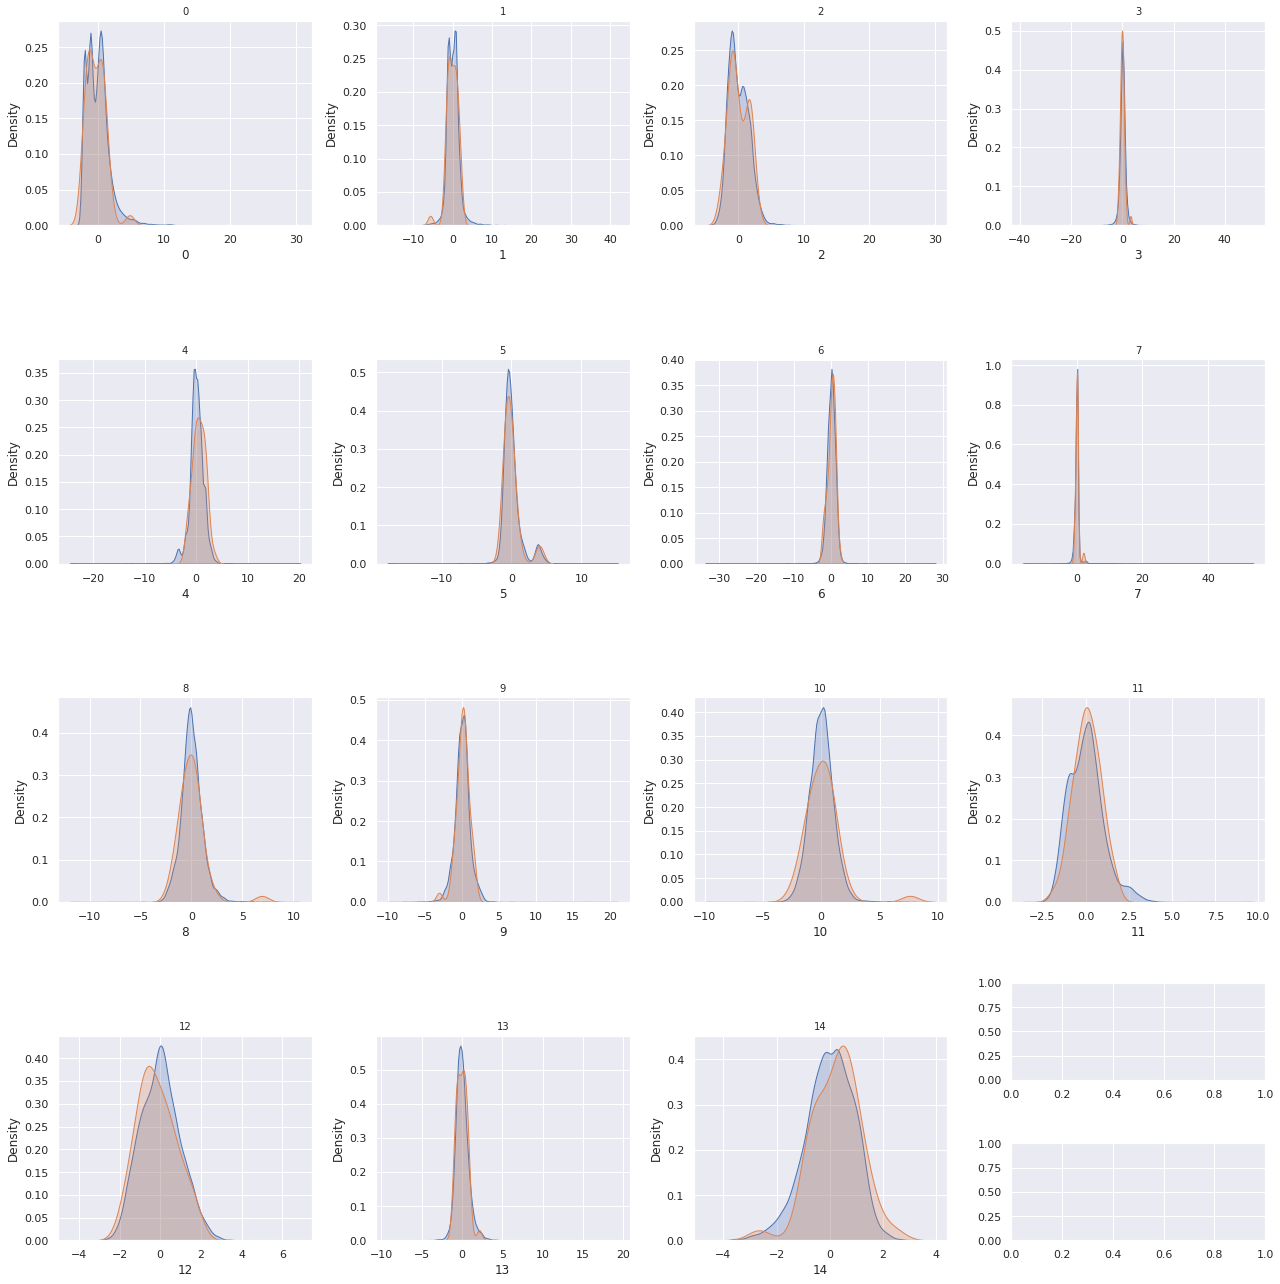

In [ ]:
# Fazendo o Distplot das variáveis do modelo 2
column_names = m2_mgd.drop(['pred'], axis=1).columns
num_plots = len(column_names)
m2_class_0 = m2_mgd[m2_mgd.pred == 0]
m2_class_1 = m2_mgd[m2_mgd.pred == 1]

fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(4, 4, idx)
    sns.kdeplot(m2_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(m2_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Agora vamos observar as correlações entre as variáveis utilizadas nos dois modelos.

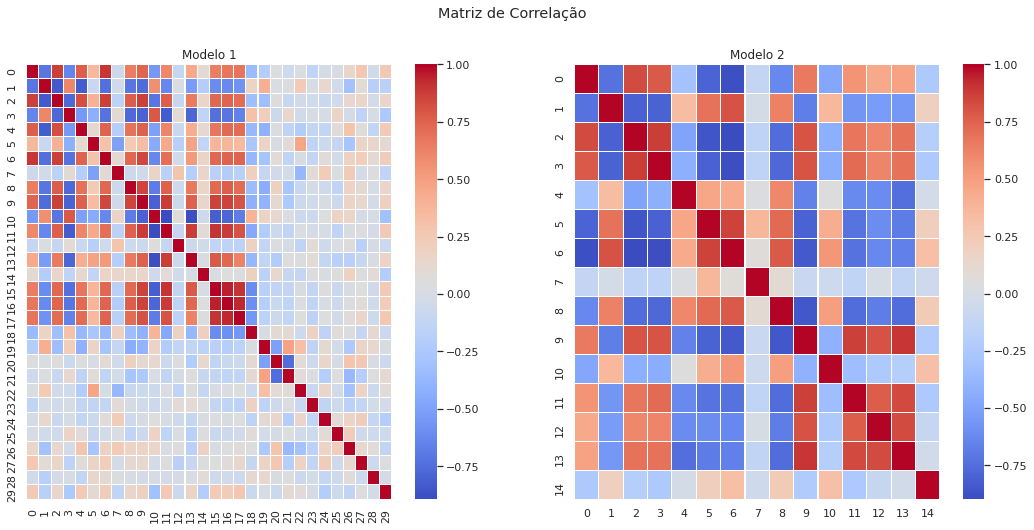

In [ ]:
# Plotando matriz de correlação entre os dados de treino dos modelos
corrm1 = pd.DataFrame(X_rus).corr()
corrm2 = pd.DataFrame(X2_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corrm1, xticklabels=corrm1.columns, yticklabels= corrm1.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Modelo 1')

sns.heatmap(corrm2, xticklabels=corrm2.columns, yticklabels=corrm2.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Modelo 2')

plt.show()

Observando os distplots e os gráficos de correlação, percebemos que o nosso PCA escolheu sim as variáveis que interessavam para o Modelo.


# **Conclusão**

A qualidade de um modelo de Machine Learning é construída em todas suas etapas, desde a análise exploratória dos dados à fase de análise de desempenho e melhoramento do modelo. Já falando sobre este final, utilizar PCA para reduzir o número de variáveis é muito importante na construção de um modelo, pois nosso risco de overfiting diminui bastante, tornando o modelo mais utilizável para outras ocasiões. Portanto mesmo que o nosso modelo de 30 variáveis tenha tido resultados um pouco melhores que o modelo de 15 variáveis, o modelo de 16 variáveis pode ser considerado melhor, pois alcançou desempenho semelhante com menos dados utilizados.